In [1]:
import json
from pandas import DataFrame
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import nltk

In [2]:
def load_tip(tip_path):
    data = [json.loads(line) for line in open(tip_path,encoding="utf8")]
    return data

In [3]:
def drop_cols(fields, dlist):
   
    for record in dlist:
        for field in fields:
            del (record[field])


def filter_data(data, field, values):
    filtered_data = [record for record in data if
                        record[field] in values]
    return filtered_data

In [4]:
def analyze(tip_path, n):
        data = load_tip(tip_path)
        drop_cols(['text',  'date', 'user_id', 'likes'],
                             data)
        data_frame = DataFrame(data)
        counts = data_frame.groupby('business_id').size()
        countval=counts.sort_values( ascending=False)
        top_counts = countval[:n]
        print(top_counts)  

We can find out which business receives tip more often.

In [5]:
tip_folder = 'E:/MyDownloads/Programming/group/'
tip_file_path = data_folder + 'tip.json'
analyze(tip_file_path, 10)

business_id
FaHADZARwnY4yvlvpnsfGA    3444
JmI9nslLD7KZqRr__Bg6NQ    2326
DkYS3arLOhA8si5uUEmHOw    1448
5LNZ67Yw9RD6nf4_UhXOjw    1413
K7lWdNUhCbcnEvI0NhGewg    1313
hihud--QRriCYZw1zZvW4g    1230
RESDUcs7fIiihp38-d6_6g    1082
yfxDa8RFOvJPQh0rNtakHA    1033
4JNXUYY8wbaaDmk3BPzlWw    1011
iCQpiavjjPzJ5_3gPD5Ebg    1004
dtype: int64


Above 10 businesses receives more often than others. Let's find out what on the tip.

In [6]:
import nltk.stem
english_stemmer = nltk.stem.SnowballStemmer('english')
from sklearn.feature_extraction.text import TfidfVectorizer

class StemmedTfidfVectorizer(TfidfVectorizer):

    def tip_analyzer(self):
        analyzer = super(StemmedTfidfVectorizer, self).tip_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

Create a function to apply TF-IDF to the text inside the tips

In [16]:
def tipword(tip_path, business_id, stem):
        data = load_tip(tip_path)
        text = [record['text'] for record in data]
        vectorizer = TfidfVectorizer(min_df=1, stop_words='english')
        if stem:
            vectorizer = StemmedTfidfVectorizer(min_df=1, stop_words='english')
        train = vectorizer.fit_transform(text)
        num_samples, num_features = train.shape
        print("#samples: %d, #features: %d" % (
            num_samples, num_features))

        business_data = filter_data(data, 'business_id', [business_id])
        text_data = [record['text'] for record in business_data]
        freq_term_matrix = vectorizer.transform(text_data)
        dictionary = vectorizer.get_feature_names()

        my_tip = []
        rows, cols = freq_term_matrix.nonzero()
        for row, col in zip(rows, cols):
            my_voca = {}
            word = dictionary[col]
            my_voca['tip_id'] = row
            my_voca['word'] = word
            my_voca['tfidf'] = freq_term_matrix[row, col]
            my_tip.append(my_voca)

        data_frame = DataFrame(my_tip)
        suma = data_frame.groupby('word').aggregate(np.sum)['tfidf']
        freqlist = suma.sort_values(ascending=False)
        print(freqlist)

Take the business "FaHADZARwnY4yvlvpnsfGA" which receives tips the most often as an example. What words appear frequently?

In [17]:
tipword(tip_file_path, 'FaHADZARwnY4yvlvpnsfGA', 0)

#samples: 1028802, #features: 117049
word
vegas          294.824283
home           209.366089
airport         94.887072
bye             76.039553
las             65.439130
terminal        61.232369
time            60.141170
flight          51.941369
baby            47.327820
security        47.320246
going           45.993823
hello           44.239330
bound           38.668643
slot            34.250585
viva            33.924970
finally         33.146537
landed          31.912381
tsa             30.848470
machines        29.020207
goodbye         27.672426
let             27.356123
picking         26.318481
leaving         26.167413
slots           25.091983
sin             24.620386
early           24.244900
gate            24.103981
fly             23.939620
free            23.909265
wifi            23.752482
                  ...    
sake             0.197404
legs             0.196294
20mins           0.196059
prime            0.193937
unhappy          0.193280
briefing         0.191

Below filters words with same meaning so that words such as drink and drinks would not showed at the same time.

In [18]:
tipword(tip_file_path, 'FaHADZARwnY4yvlvpnsfGA', 1)

#samples: 1028802, #features: 117049
word
vegas          294.824283
home           209.366089
airport         94.887072
bye             76.039553
las             65.439130
terminal        61.232369
time            60.141170
flight          51.941369
baby            47.327820
security        47.320246
going           45.993823
hello           44.239330
bound           38.668643
slot            34.250585
viva            33.924970
finally         33.146537
landed          31.912381
tsa             30.848470
machines        29.020207
goodbye         27.672426
let             27.356123
picking         26.318481
leaving         26.167413
slots           25.091983
sin             24.620386
early           24.244900
gate            24.103981
fly             23.939620
free            23.909265
wifi            23.752482
                  ...    
sake             0.197404
legs             0.196294
20mins           0.196059
prime            0.193937
unhappy          0.193280
briefing         0.191

This business is a hotel obviously while it contains some useful information, the restaurant is the one we would like to analyze. However we can still had some findings such as free wifi is an important reason when customers give tips.  

Next let's find out the tip words on the lists of out result sheet.

In [12]:
import pandas as pd
result = pd.read_csv("E:/MyDownloads/Programming/group/result.csv")

In [13]:
result.head()

,Unnamed: 0,state,city,business_id,business_name,address,review_starsOfAvgOfMax,business_review_count,attributes,categories,hours,latitude,longitude,neighborhood,postal_code,review_id,review_date,Text
0,1,AZ,Ahwatukee,=-v8Z3mdbbPs1ljLziHr2DA,My Wine Cellar,"5030 E Warner Rd, Ste 2",3.0,166,"{'Alcohol': 'beer_and_wine', 'HasTV': True, 'N...","['Wine Bars', 'Tapas/Small Plates', 'Gastropub...","{'Monday': '15:00-22:00', 'Tuesday': '15:00-22...",33.333688,-111.977519,NaN,85044,5kn-2_frpQDyVus_WRGJ-g,3/28/2016,This is a nice happy hour spot and it has a go...
1,2,AZ,Anthem,C-Qkudv7u8465nLasGR31A,Tru Burger Co.,39504 Daisy Mountain Dr,4.5,137,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...","['Burgers', 'Sandwiches', 'Restaurants', 'Amer...","{'Monday': '11:00-22:00', 'Tuesday': '11:00-22...",33.843457,-112.134722,NaN,85086,192JtX6n_rngJmGu3Wvo5Q,7/13/2017,I'm new to anthem so we tried out what looked ...
2,3,AZ,Anthem,C-Qkudv7u8465nLasGR31A,Tru Burger Co.,39504 Daisy Mountain Dr,4.5,137,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...","['Burgers', 'Sandwiches', 'Restaurants', 'Amer...","{'Monday': '11:00-22:00', 'Tuesday': '11:00-22...",33.843457,-112.134722,NaN,85086,4YWKO2TgNpmJGMhHxG6LLQ,10/15/2016,The most amazing burger in AZ and almost anywh...
3,4,AZ,Avondale,3JxKzWquEbPC3yPIfoCiLw,Eest Asian Bistro,"3145 N Dysart Rd, Ste C102",5.0,118,"{'RestaurantsTableService': True, 'GoodForMeal...","['Restaurants', 'Asian Fusion']","{'Monday': '11:00-21:30', 'Tuesday': '11:00-21...",33.481101,-112.339392,NaN,85392,6mPJgOafrDY6cHnDtk4Hlw,1/15/2017,What a wonderful dining experience. The staff ...
4,5,AZ,Avondale,NzWpIwYwGsjujewhYjPPPg,JT Boba House,"10160 W Mcdowell Rd, Ste 130",5.0,162,"{'RestaurantsTableService': False, 'GoodForMea...","['Taiwanese', 'Coffee & Tea', 'Food', 'Restaur...","{'Monday': '10:00-22:00', 'Tuesday': '10:00-22...",33.467020,-112.279124,NaN,85392,16qBu781aD5Tmq7N37-0eg,8/6/2016,What a great Boba Place they have at least 40 ...


Here we only select 'business_id' from our result table because we will use it to select the tip texts from tip file.

In [14]:
newresult=result[['business_id']]

In [15]:
newresult.head()

,business_id
0,=-v8Z3mdbbPs1ljLziHr2DA
1,C-Qkudv7u8465nLasGR31A
2,C-Qkudv7u8465nLasGR31A
3,3JxKzWquEbPC3yPIfoCiLw
4,NzWpIwYwGsjujewhYjPPPg


In [16]:
tipcsv = pd.read_csv("E:/MyDownloads/Programming/group/tip.csv",encoding='windows-1252')

In [20]:
tipcsv.head()

,business_id,date,likes,text,user_id
0,tJRDll5yqpZwehenzE2cSg,7/15/2012,0,Get here early enough to have dinner.,zcTZk7OG8ovAmh_fenH21g
1,jH19V2I9fIslnNhDzPmdkA,8/12/2015,0,Great breakfast large portions and friendly wa...,ZcLKXikTHYOnYt5VYRO5sg
2,dAa0hB2yrnHzVmsCkN4YvQ,6/20/2014,0,Nice place. Great staff. A fixture in the tow...,oaYhjqBbh18ZhU0bpyzSuw
3,dAa0hB2yrnHzVmsCkN4YvQ,10/12/2016,0,Happy hour 5-7 Monday - Friday,ulQ8Nyj7jCUR8M83SUMoRQ
4,ESzO3Av0b1_TzKOiqzbQYQ,1/28/2017,0,"Parking is a premium, keep circling, you will ...",ulQ8Nyj7jCUR8M83SUMoRQ


In [17]:
tiptext=tipcsv[['business_id','text']]

In [41]:
tiptext.head()

,business_id,text
0,C-Qkudv7u8465nLasGR31A,Had another visit. Much more efficient. Good l...
1,C-Qkudv7u8465nLasGR31A,Delicious food fresh and the staff were friendly
2,C-Qkudv7u8465nLasGR31A,The food is fantastic and the new owners are a...
3,C-Qkudv7u8465nLasGR31A,Very clean. Great service and good food.
4,C-Qkudv7u8465nLasGR31A,Ask the bartenders for specials! Trying a cucu...


We mergered two tables to a new file since we care about the words on the tip of our selected businesses.

In [18]:
merged=newresult.merge(tiptext,on='business_id')
merged.to_csv("tiptext.csv",index=False)

In [19]:
tiptext = pd.read_csv("tiptext.csv",encoding='windows-1252')

In [44]:
tiptext.head()

,business_id,text
0,C-Qkudv7u8465nLasGR31A,Had another visit. Much more efficient. Good l...
1,C-Qkudv7u8465nLasGR31A,Delicious food fresh and the staff were friendly
2,C-Qkudv7u8465nLasGR31A,The food is fantastic and the new owners are a...
3,C-Qkudv7u8465nLasGR31A,Very clean. Great service and good food.
4,C-Qkudv7u8465nLasGR31A,Ask the bartenders for specials! Trying a cucu...


In [20]:
newtext=tiptext[['text']]

In [21]:
newtext.to_csv('newtext.csv')

In [22]:
import collections 
import re

In [23]:
words=re.findall(r'\w+',open('newtext.csv').read().lower())

Find top 50 common words.

In [26]:
most_common=collections.Counter(words).most_common(50)

In [27]:
print(most_common)

[('the', 2756), ('and', 2005), ('is', 1246), ('food', 1236), ('great', 1219), ('a', 1200), ('to', 1017), ('good', 1005), ('for', 827), ('i', 765), ('service', 736), ('it', 710), ('place', 704), ('in', 626), ('was', 605), ('of', 595), ('you', 564), ('this', 495), ('with', 464), ('best', 459), ('on', 430), ('they', 426), ('here', 413), ('love', 399), ('s', 385), ('very', 381), ('t', 379), ('but', 364), ('are', 353), ('my', 334), ('amazing', 313), ('so', 310), ('get', 298), ('have', 289), ('not', 278), ('be', 274), ('awesome', 262), ('we', 237), ('try', 235), ('time', 234), ('at', 233), ('friendly', 213), ('always', 210), ('nice', 209), ('that', 208), ('delicious', 202), ('if', 202), ('all', 197), ('can', 192), ('wait', 190)]


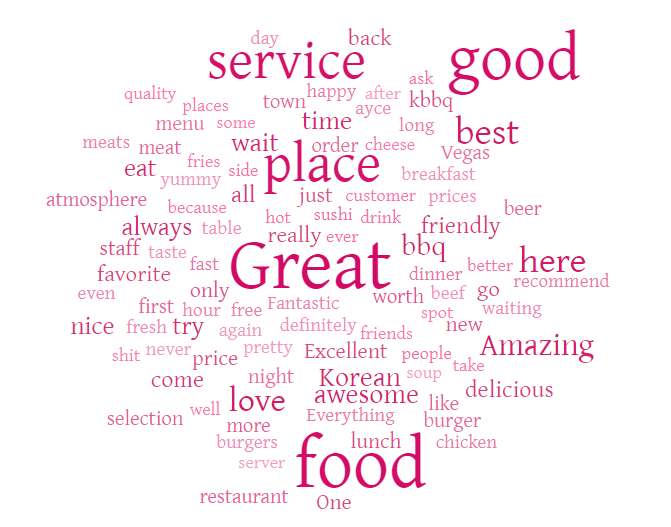

In [1]:
from IPython.display import Image
Image(filename = "tipcloud.png")